In [7]:
from ipfnpytools.plot import plot_signals
import ipfnpytools.aug_read as aug_read
import matplotlib.pyplot as plt
#plt.style.use('/home/guimas/python/ipfnpytools/ipfnpytools/helvet2.mplstyle')
from getsig import getsig
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:950pt !important; }</style>"))

## Closeness to DN and upper triangularity

In [34]:
shotnrs = [35876, 35877, 35878, 35879, 35880, 35881, 35882, 35883, 35884, 35893, 35835, 35836]
newshots = []
for s in shotnrs:
    newshots.append(s)
    newshots.append(s)
    
names = (["delRoben","XPfdif"])*len(shotnrs)
diags = (["GQH"])*len(shotnrs)*2
data = aug_read.many_signals(
    diagnostics=diags,
    names=names,
    shots=newshots)

plot_signals({...}) took 1.2996 seconds


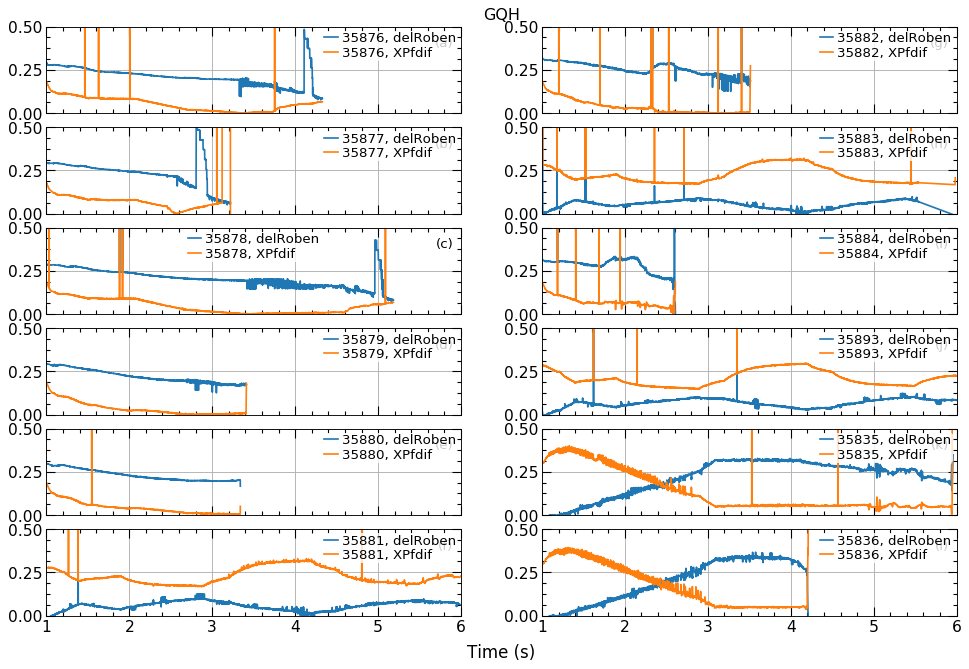

In [39]:
boxes = []
for s in range(len(shotnrs)):
    for sig in range(2):
        boxes.append(s)

fig, axes, fig_name = plot_signals(
    data=data, postfixes="overview",
    boxes=boxes,
    ncols=2,
    maintain_colors=True,
    legend_kw=dict(loc='best'),
    #sharey='row',
    y_mins=0.0,
    y_maxs=0.5,
    t_begin=1, t_end=6,
    write_shots=True,
)

## Individual shot overview

In [12]:
shotnr = 35876
names = ["H-0", "H-5", "PECRH", "PNI", "PICRFc",r"D_tot",r"N_tot",r"Pre_OuDi",r"Pre_InDi","F18","F12","delRoben","XPfdif"]
data = aug_read.many_signals(
    diagnostics=(2*["DCN"] + ["ECS","NIS","ICP"] + 2*["UVS"] + 2*["MSQ"] +2*["IOC"] +2*["GQH"]),
    names=names,
    shots=[shotnr])

/home/guimas/anaconda2/envs/tokis/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2878: UserWarning: not reading signal ICP/PICRFc due to PyddError: ('libddww error: Error by DDopen (8.1): shotfile does not exist !', {'function': 'shotfile.open', 'trace': ['_run_module_as_main', '_run_code', '<module>', 'launch_instance', 'IPKernelApp.start', 'ZMQIOLoop.start', 'null_wrapper', 'ZMQStream._handle_events', 'ZMQStream._handle_recv', 'ZMQStream._run_callback', 'null_wrapper', 'IPythonKernel.dispatcher', 'IPythonKernel.dispatch_shell', 'IPythonKernel.execute_request', 'IPythonKernel.do_execute', 'ZMQInteractiveShell.run_cell', 'ZMQInteractiveShell.run_cell', 'ZMQInteractiveShell.run_ast_nodes', 'ZMQInteractiveShell.run_code', '<module>', 'many_signals', 'shotfile.__init__', 'shotfile.open'], 'diagnostic': 'ICP', 'edition': 0, 'experiment': 'AUGD', 'pulseNumber': 35876})
  exec(code_obj, self.user_global_ns, self.user_ns)


/home/guimas/python/ipfnpytools/ipfnpytools/timing.py:30: UserWarning: not plotting dataset 4 due to TypeError: ("unsupported operand type(s) for *: 'NoneType' and 'int'",)
  result = f(*args, **kw)


plot_signals({...}) took 0.50551 seconds


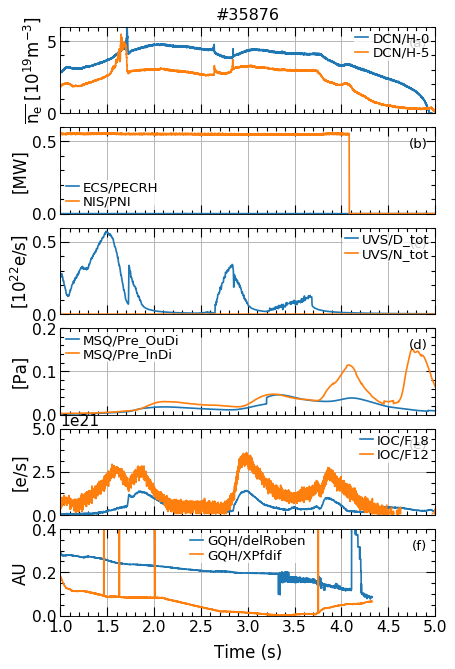

In [15]:
fig, axes, fig_name = plot_signals(
    data=data, postfixes="overview", boxes=([0]*2 + [1]*3 + [2]*2 + [3]*2 + [4]*2 + [5]*2),maintain_colors=True,
    legend_kw=dict(loc='best'),
    signal_multipliers=([1E-19] * 2 + [1E-6]*3 + [1E-22]*2 + [133.0]*2 + [1.0]*2 + [1.0]*2),
    y_labels=[r"$\overline{n_e}$ [$10^{19}m^{-3}]$", r"[MW]", r"$[10^{22}e/s]$", r"[Pa]", r"[e/s]", r"AU"], 
    y_mins=0.0,
    y_maxs=([6]*2 + [0.6]*3 + [0.6]*2 + [0.2]*2 + [5e21]*2 + [0.4]*2),
    t_begin=1, t_end=5,
    title=r'#'+str(shotnr)    
)

In [47]:
shotnr = 35835
lfsr = getsig(shotnr, 'RDL', 'LFSR')
hfsr = getsig(shotnr, 'RDL', 'HFSR')
lfsrho = getsig(shotnr, 'RDL', 'LFSRHO')
hfsrho = getsig(shotnr, 'RDL', 'HFSRHO')

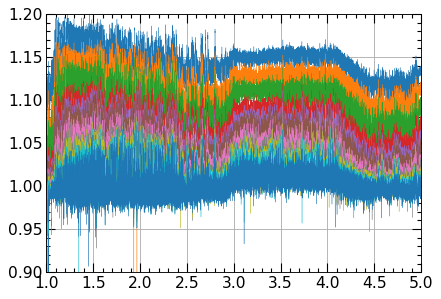

In [48]:
plt.plot(lfsrho.time, lfsrho.data, lw=0.3)
plt.xlim(1,5)
plt.ylim(0.9,1.2)
plt.show()

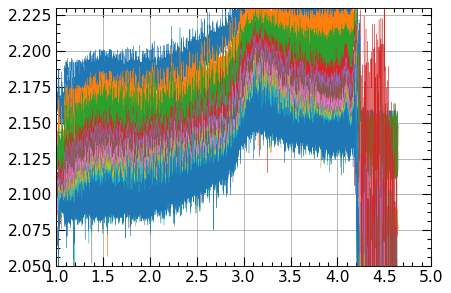

In [43]:
plt.plot(lfsr.time, lfsr.data, lw=0.3)
plt.xlim(1,5)
plt.ylim(2.05, 2.23)
plt.show()

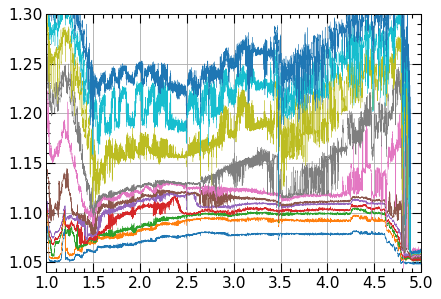

In [33]:
plt.plot(hfsr.time, hfsr.data, lw=0.3)
plt.xlim(1,5)
plt.ylim(1.04, 1.3)
plt.show()

In [49]:
felm = getsig(35835, 'ELM', 'f_ELM')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


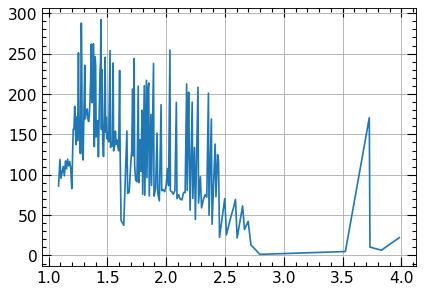

In [50]:
plt.plot(felm.time, felm.data)
plt.show()